# Customer Segmentation Project

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [3]:
df = pd.read_csv('ifood_df.csv')
print(" Dataset Preview:")
print(df.head())
print("\n Dataset Info:")
print(df.info())

 Dataset Preview:
    Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  marital_Together  \
0              172                88            88  ...                 0   
1                2                 1             6  ...                 0   
2              111                21            42  ...                 1   
3               10                 3             5  ...                 1   
4               46                27            15  ...                 0   

   marital_Widow  education_2n Cycle  

In [4]:
# Check for missing values
print("\n Missing Values:")
print(df.isnull().sum())

# Impute missing income if needed
df["Income"].fillna(df["Income"].median(), inplace=True)

# Feature selection for segmentation
features = [
    "Income",
    "Kidhome",
    "Teenhome",
    "Recency",
    "MntWines",
    "MntFruits",
    "MntMeatProducts",
    "MntFishProducts",
    "MntSweetProducts",
    "MntGoldProds",
    "MntTotal",
    "MntRegularProds"
]

X = df[features]

print("\n Descriptive Statistics:")
print(X.describe())



 Missing Values:
Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds     

C:\Users\anwai\AppData\Local\Temp\ipykernel_5928\857752506.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Income"].fillna(df["Income"].median(), inplace=True)


In [5]:
# 4️ Standardize Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

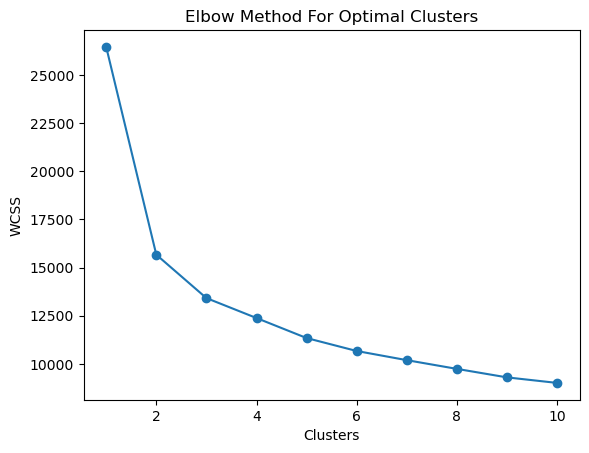

In [6]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss, marker='o')
plt.title("Elbow Method For Optimal Clusters")
plt.xlabel("Clusters")
plt.ylabel("WCSS")
plt.show()

In [7]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

print("\n🎯 Customers assigned to clusters:")
print(df["Cluster"].value_counts())


🎯 Customers assigned to clusters:
Cluster
1    1008
2     563
0     321
3     313
Name: count, dtype: int64


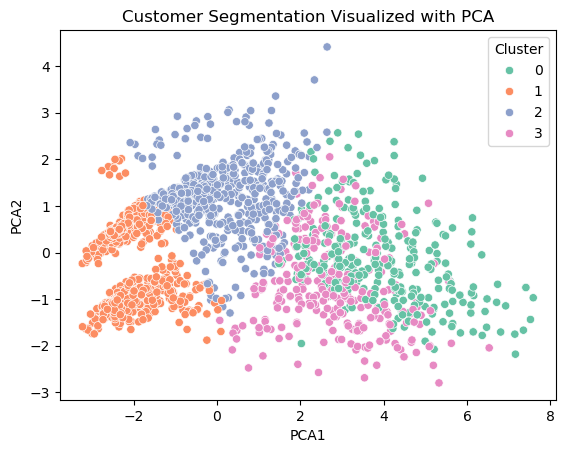

In [8]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_scaled)

df["PCA1"] = pca_data[:,0]
df["PCA2"] = pca_data[:,1]

plt.figure()
sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="Cluster", palette="Set2")
plt.title("Customer Segmentation Visualized with PCA")
plt.show()

In [9]:
print("\n📌 Cluster Characteristics:")
cluster_summary = df.groupby("Cluster")[features].mean()
print(cluster_summary)


📌 Cluster Characteristics:
               Income   Kidhome  Teenhome    Recency    MntWines  MntFruits  \
Cluster                                                                       
0        77686.644860  0.049844  0.124611  50.635514  827.330218  58.009346   
1        33975.586310  0.856151  0.414683  48.983135   47.454365   5.375000   
2        57900.087034  0.122558  0.957371  48.234458  421.316163  15.884547   
3        70428.645367  0.086262  0.383387  48.817891  397.715655  80.629393   

         MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
Cluster                                                                     
0             557.031153        83.520249         60.115265     63.124611   
1              26.431548         7.781746          5.303571     16.647817   
2             114.197158        22.085258         16.113677     53.202487   
3             302.779553       115.543131         83.396166     96.322684   

            MntTotal  MntRegularPr

In [10]:
print("\n RECOMMENDATIONS:")
for c in range(k):
    avg_income = cluster_summary.loc[c, "Income"]
    avg_spend = cluster_summary.loc[c, "MntTotal"]
    
    if avg_income > df["Income"].median() and avg_spend > df["MntTotal"].median():
        print(f"Cluster {c}: High spenders — focus premium offers, loyalty rewards.")
    elif avg_spend < df["MntTotal"].median():
        print(f"Cluster {c}: Low spenders — push discounts, product bundles.")
    else:
        print(f"Cluster {c}: Mid spenders — cross-selling campaigns.")

print("\n📌 Use clusters for marketing personalization:")
print("""
• Target high-value cluster with exclusive promotions
• Design family packages for high Kidhome/Teenhome segments
• For low recency customers: re-engagement campaigns
• Promote seasonal categories to sweet & wine spenders
• Focus acquisition budget on high lifetime value clusters
""")




 RECOMMENDATIONS:
Cluster 0: High spenders — focus premium offers, loyalty rewards.
Cluster 1: Low spenders — push discounts, product bundles.
Cluster 2: High spenders — focus premium offers, loyalty rewards.
Cluster 3: High spenders — focus premium offers, loyalty rewards.

📌 Use clusters for marketing personalization:

• Target high-value cluster with exclusive promotions
• Design family packages for high Kidhome/Teenhome segments
• For low recency customers: re-engagement campaigns
• Promote seasonal categories to sweet & wine spenders
• Focus acquisition budget on high lifetime value clusters



# End of the project